In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import pyogrio
import json

from scipy.spatial import ConvexHull
from shapely.geometry import Polygon
from pyproj import Transformer

In [18]:
data_path = "../../data/geojson"
save_data_list = []
for file in os.listdir(data_path):
    with open(f"{data_path}/{file}", 'r', encoding='utf-8') as f:
        content = json.load(f)

    help_list = []
    for floor_c in content["floors"]:
        for c in floor_c["data"]:
            help_dict = {}
            for k, v in c.items():
                if isinstance(v, dict):
                    for k_2, v_2 in v.items():
                        help_dict[f"{k}_{k_2}"] = v_2
                else:
                    help_dict[k] = v
            help_list.append(help_dict)

    df_geo = pd.DataFrame(help_list)
    df_geo.insert(0, "location_name", content["name"])
    df_geo.insert(0, "store_code", "STO" + content["storeNo"])

    save_data_list.append(df_geo)

df_all_maps = pd.concat(save_data_list, ignore_index=True)

In [20]:
df_all_maps.isna().mean(axis=0)

store_code                    0.000000
location_name                 0.000000
type                          0.000000
properties_uid                0.004967
properties_layer              0.000000
properties_floor              0.000000
geometry_type                 0.000000
geometry_coordinates          0.000000
id                            0.988400
properties_id                 0.992151
properties_description        0.997187
properties_weight             0.558801
properties_kioskId            0.995033
properties_deviceName         0.995033
properties_subtype            0.985274
properties_type               0.696061
properties_rotation           0.995033
properties_aisle              0.997256
properties_rebuild            0.999861
properties_coordinate         0.887677
properties_connectTo          0.998229
properties_direction          0.998020
properties_shaftDirection     0.998020
properties_connectionPoint    0.998090
properties_parents            0.258127
properties_areaLetter    

In [24]:
df_dep = df_all_maps[df_all_maps["properties_layer"] == "departments"].reset_index(drop=True)

In [25]:
df_dep

,store_code,location_name,type,properties_uid,properties_layer,properties_floor,geometry_type,geometry_coordinates,id,properties_id,...,properties_aisle,properties_rebuild,properties_coordinate,properties_connectTo,properties_direction,properties_shaftDirection,properties_connectionPoint,properties_parents,properties_areaLetter,properties_floorOrdinal
0,STO031,Alcorcón,Feature,03394d06-a5bc-4b8d-959e-34017297ffb4,departments,1d25dd44-4ec6-4378-b85a-7a298aa49ef3,Polygon,"[[[-3.855296600281271, 40.3500145140054], [-3....",12a9f3cacec01bdb823bf7dd5be9a7d6,POI_SUBTYPE_CHECK_OUT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,STO031,Alcorcón,Feature,548bb112-8362-4b34-b240-9541780efac1,departments,1d25dd44-4ec6-4378-b85a-7a298aa49ef3,Polygon,"[[[-3.855238627481258, 40.35025823195071], [-3...",970b3a8bbd746fb017c3ef9ac9ca0520,POI_SUBTYPE_BISTRO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,STO031,Alcorcón,Feature,138e8504-5b45-4493-88b4-aceca01a8e1b,departments,1d25dd44-4ec6-4378-b85a-7a298aa49ef3,Polygon,"[[[-3.855315070854734, 40.34980452167247], [-3...",NaN,POI_SUBTYPE_CUSTOMER_SERVICE,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,STO031,Alcorcón,Feature,736a7d2b-2472-4cd8-8f38-123aca3699d8,departments,1d25dd44-4ec6-4378-b85a-7a298aa49ef3,Polygon,"[[[-3.855503106530679, 40.34974032688599], [-3...",8a9be51405d4cabe903d203446423df2,POI_SUBTYPE_CIRCULAR_HUB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,STO031,Alcorcón,Feature,2330e389-c355-4a9e-b9c9-8fbaec48ab3a,departments,1d25dd44-4ec6-4378-b85a-7a298aa49ef3,Polygon,"[[[-3.855565521128644, 40.35002788365658], [-3...",c077796c66dde21fc384b807ea61d805,POI_SUBTYPE_ACTIVITY_AREA_0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,STO498,Ensanche de Vallecas,Feature,efd4f4e3-e65e-4abf-bfbe-73162b82c65d,departments,e782b878-8168-412a-a858-edffc3b09956,Polygon,"[[[-3.595972130306453, 40.36878788903604], [-3...",NaN,DEPT_005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'uid': '8a2f19a1-43aa-4112-9e6e-dda003bf2cd6...,NaN,NaN
97,STO498,Ensanche de Vallecas,Feature,f4bd6b03-67ee-4f51-bdfd-1e7eca5c5cf2,departments,e782b878-8168-412a-a858-edffc3b09956,Polygon,"[[[-3.595646803981008, 40.368904781100284], [-...",NaN,DEPT_012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'uid': '8a2f19a1-43aa-4112-9e6e-dda003bf2cd6...,NaN,NaN
98,STO498,Ensanche de Vallecas,Feature,5b7a2707-0f4b-4029-90f0-aec1efdbb2bb,departments,e782b878-8168-412a-a858-edffc3b09956,Polygon,"[[[-3.595455874422802, 40.36932113684808], [-3...",NaN,DEPT_013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'uid': '8a2f19a1-43aa-4112-9e6e-dda003bf2cd6...,NaN,NaN
99,STO498,Ensanche de Vallecas,Feature,c5cf204f-83cf-4bdd-be27-4192c429681e,departments,e782b878-8168-412a-a858-edffc3b09956,Polygon,"[[[-3.595991496089224, 40.36937927165333], [-3...",NaN,DEPT_014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'uid': '8a2f19a1-43aa-4112-9e6e-dda003bf2cd6...,NaN,NaN


In [23]:
def compute_area(data_poly):
    data_list = [tuple(d) for d in data_poly]

    transformer = Transformer.from_crs("EPSG:4326", "EPSG:25830", always_xy=True)

    projected = [transformer.transform(lon, lat) for lon, lat in data_list]

    # Calcular área
    polygon = Polygon(projected)
    area_m2 = polygon.area

    return area_m2

In [26]:
help_list = []
for idx_coor, coor in df_dep["geometry_coordinates"].items():
    
    try:
        coor_array = np.array(coor)
    except Exception as ValueError:
        coor_list = [x[:2] if len(x) == 3 else x for x in coor]
        coor_array = np.array(coor_list)

    if len(coor_array.shape) == 3:
        coor = coor[0]
        area = 0 if len(coor) < 4 else compute_area(np.array(coor)[:, :2])
    elif len(coor_array.shape) == 2:
        if coor_array.shape[-1] == 3:
            coor_array = coor_array[:, :2]
            area = 0 if len(coor_array) < 4 else compute_area(coor_array)
        else:
            area = 0 if len(coor) < 4 else compute_area(coor)
    elif len(coor_array.shape) == 1:
        area = 0


    help_list.append({
        "index": idx_coor,
        "area": area
    })

df_area = pd.DataFrame(help_list)

df_dep = pd.merge(df_dep, df_area, left_index=True, right_on='index')
df_dep.drop(columns='index', inplace=True)

In [32]:
df_dep

,store_code,location_name,type,properties_uid,properties_layer,properties_floor,geometry_type,geometry_coordinates,id,properties_id,...,properties_rebuild,properties_coordinate,properties_connectTo,properties_direction,properties_shaftDirection,properties_connectionPoint,properties_parents,properties_areaLetter,properties_floorOrdinal,area
0,STO031,Alcorcón,Feature,03394d06-a5bc-4b8d-959e-34017297ffb4,departments,1d25dd44-4ec6-4378-b85a-7a298aa49ef3,Polygon,"[[[-3.855296600281271, 40.3500145140054], [-3....",12a9f3cacec01bdb823bf7dd5be9a7d6,POI_SUBTYPE_CHECK_OUT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.192775
1,STO031,Alcorcón,Feature,548bb112-8362-4b34-b240-9541780efac1,departments,1d25dd44-4ec6-4378-b85a-7a298aa49ef3,Polygon,"[[[-3.855238627481258, 40.35025823195071], [-3...",970b3a8bbd746fb017c3ef9ac9ca0520,POI_SUBTYPE_BISTRO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.719006
2,STO031,Alcorcón,Feature,138e8504-5b45-4493-88b4-aceca01a8e1b,departments,1d25dd44-4ec6-4378-b85a-7a298aa49ef3,Polygon,"[[[-3.855315070854734, 40.34980452167247], [-3...",NaN,POI_SUBTYPE_CUSTOMER_SERVICE,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404.195314
3,STO031,Alcorcón,Feature,736a7d2b-2472-4cd8-8f38-123aca3699d8,departments,1d25dd44-4ec6-4378-b85a-7a298aa49ef3,Polygon,"[[[-3.855503106530679, 40.34974032688599], [-3...",8a9be51405d4cabe903d203446423df2,POI_SUBTYPE_CIRCULAR_HUB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272.176302
4,STO031,Alcorcón,Feature,2330e389-c355-4a9e-b9c9-8fbaec48ab3a,departments,1d25dd44-4ec6-4378-b85a-7a298aa49ef3,Polygon,"[[[-3.855565521128644, 40.35002788365658], [-3...",c077796c66dde21fc384b807ea61d805,POI_SUBTYPE_ACTIVITY_AREA_0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,642.737854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,STO498,Ensanche de Vallecas,Feature,efd4f4e3-e65e-4abf-bfbe-73162b82c65d,departments,e782b878-8168-412a-a858-edffc3b09956,Polygon,"[[[-3.595972130306453, 40.36878788903604], [-3...",NaN,DEPT_005,...,NaN,NaN,NaN,NaN,NaN,NaN,[{'uid': '8a2f19a1-43aa-4112-9e6e-dda003bf2cd6...,NaN,NaN,168.747113
97,STO498,Ensanche de Vallecas,Feature,f4bd6b03-67ee-4f51-bdfd-1e7eca5c5cf2,departments,e782b878-8168-412a-a858-edffc3b09956,Polygon,"[[[-3.595646803981008, 40.368904781100284], [-...",NaN,DEPT_012,...,NaN,NaN,NaN,NaN,NaN,NaN,[{'uid': '8a2f19a1-43aa-4112-9e6e-dda003bf2cd6...,NaN,NaN,408.828027
98,STO498,Ensanche de Vallecas,Feature,5b7a2707-0f4b-4029-90f0-aec1efdbb2bb,departments,e782b878-8168-412a-a858-edffc3b09956,Polygon,"[[[-3.595455874422802, 40.36932113684808], [-3...",NaN,DEPT_013,...,NaN,NaN,NaN,NaN,NaN,NaN,[{'uid': '8a2f19a1-43aa-4112-9e6e-dda003bf2cd6...,NaN,NaN,1727.145156
99,STO498,Ensanche de Vallecas,Feature,c5cf204f-83cf-4bdd-be27-4192c429681e,departments,e782b878-8168-412a-a858-edffc3b09956,Polygon,"[[[-3.595991496089224, 40.36937927165333], [-3...",NaN,DEPT_014,...,NaN,NaN,NaN,NaN,NaN,NaN,[{'uid': '8a2f19a1-43aa-4112-9e6e-dda003bf2cd6...,NaN,NaN,347.691849


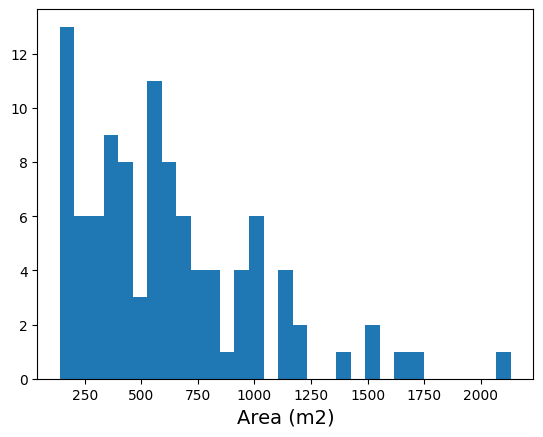

In [31]:
plt.hist(df_dep["area"], bins=31)

plt.xlabel("Area (m2)", fontsize=14)

plt.show()

In [35]:
translations_dict = {
    "DEPT_001": "Orden en casa",
    "DEPT_002": "Iluminación y hogar inteligente",
    "DEPT_003": "Utensilios para cocinar y comer",
    "DEPT_004": "Decoración y espejos",
    "DEPT_005": "Muebles y accesorios de baño",
    "DEPT_006": "Alfombras y suelos",
    "DEPT_007": "Textiles",
    "DEPT_008": "Ropa de cama",
    "DEPT_009": "Salones",
    "DEPT_010": "Comedores",
    "DEPT_011": "Cocinas",
    "DEPT_012": "Espacios de trabajo",
    "DEPT_013": "Dormitorios y armarios",
    "DEPT_014": "IKEA y los niños",
    "DEPT_015": "Flores y plantas",
    "DEPT_016": "Almacenaje para salones",
    "DEPT_017": "Tienda de alimentación sueca",
    "DEPT_018": "Accesorios de baño",
    "DEPT_019": "Muebles de baño",
    "DEPT_020": "Menaje de cocina",
    "DEPT_021": "Vajilla",
    "DEPT_022": "Armarios",
    "DEPT_023": "Camas y colchones",
    "DEPT_024": "Cocinas",
    "DEPT_025": "Electrodomésticos",
    "DEPT_026": "Jardín y terraza",
    "DIV_MARKETHALL": "Área de Complementos",
    "DIV_MARKETHALL_DESCRIPTION": "Encuentra todo lo que necesitas para tu hogar, todo en un mismo lugar.",
    "DIV_SELF_SERVE": "Autoservicio",
    "DIV_SELF_SERVE_DESCRIPTION": "Recoge los muebles en paquetes planos listos para montarlos y disfrutarlos en casa.",
    "DIV_SHOWROOM": "Exposición",
    "DIV_SHOWROOM_DESCRIPTION": "Descubre nuestra exposición e inspírate con soluciones para tu hogar. ",
    "DIV_WAREHOUSE": "Punto de recogida",
    "FLOOR_0": "Planta baja",
    "FLOOR_1": "Primera planta",
    "FLOOR_PARAMETERIZED": "Planta {{floorNo}}",
    "POI_SUBTYPE_ACTIVITY_AREA": "Área de actividad",
    "POI_SUBTYPE_BISTRO": "Bistró sueco",
    "POI_SUBTYPE_BISTRO_DESCRIPTION": "Disfruta de perritos calientes, helados, refrescos mientras compras.",
    "POI_SUBTYPE_CAFE": "Cafetería sueca",
    "POI_SUBTYPE_CAFE_DESCRIPTION": "Date un respiro disfrutando de una taza de café recién hecho y de nuestros rollos de canela.",
    "POI_SUBTYPE_CHECK_OUT": "Cajas",
    "POI_SUBTYPE_CHECK_OUT_DESCRIPTION": "¿Lo tienes todo? Finaliza la compra en la caja. ",
    "POI_SUBTYPE_CHRISTMAS_MARKET": "Mercado navideño",
    "POI_SUBTYPE_CIRCULAR_HUB": "Mercado circular",
    "POI_SUBTYPE_CLICK_AND_COLLECT": "Click & Collect",
    "POI_SUBTYPE_CLICK_AND_COLLECT_DESCRIPTION": "¿Has pedido algo por Internet? Tus artículos estarán listos para recoger aquí.",
    "POI_SUBTYPE_CUSTOMER_SERVICE": "Atención al cliente",
    "POI_SUBTYPE_CUSTOMER_SERVICE_DESCRIPTION": "Nuestro equipo siempre te facilitará las cosas, tanto si necesitas ayuda como si tienes alguna pregunta o buscas piezas de repuesto.",
    "POI_SUBTYPE_DELIVERY_SERVICES": "Servicio de entrega",
    "POI_SUBTYPE_DELIVERY_SERVICES_DESCRIPTION": "¿Necesitas recibirlo en casa? ¡Ningún problema! Te enviamos toda tu compra a domicilio.",
    "POI_SUBTYPE_ENTRANCE": "Entrada",
    "POI_SUBTYPE_ENTRANCE_EXIT": "Entrada / Salida",
    "POI_SUBTYPE_ESCALATOR": "Escaleras",
    "POI_SUBTYPE_EXCHANGES_AND_RETURNS": "Atención al cliente",
    "POI_SUBTYPE_EXCHANGES_AND_RETURNS_DESCRIPTION": "¿Has cambiado de opinión? No pasa nada, te damos un plazo de 365 días para realizar tus devoluciones. ",
    "POI_SUBTYPE_EXIT": "Salida",
    "POI_SUBTYPE_FINANCIAL_DESK": "Servicio financiero",
    "POI_SUBTYPE_FINANCIAL_DESK_DESCRIPTION": "Financiamos tus compras para que solo tengas que preocuparte de disfrutar de tu hogar. ",
    "POI_SUBTYPE_FIRST_AID_ROOM": "Servicio médico",
    "POI_SUBTYPE_FIRST_AID_ROOM_DESCRIPTION": "En caso de emergencia, aquí encontrarás la sala de primeros auxilios.",
    "POI_SUBTYPE_FURNITURE_TROLLEY": "Carros planos",
    "POI_SUBTYPE_IKEA_FAMILY": "IKEA Family",
    "POI_SUBTYPE_IKEA_FAMILY_DESCRIPTION": "Únete a IKEA Family para disfrutar de ofertas exclusivas, descuentos especiales y ventajas personalizadas. Es nuestra manera de agradecerte que formes parte de la familia IKEA, en la que todas las personas son bienvenidas.",
    "POI_SUBTYPE_IKEA_FOR_BUSINESS": "IKEA para Empresas",
    "POI_SUBTYPE_IKEA_FOR_BUSINESS_DESCRIPTION": "IKEA para Empresas ofrece soluciones personalizadas para tu espacio de trabajo, desde servicios de planificación hasta ideas de diseño.",
    "POI_SUBTYPE_INFORMATION": "Punto de información",
    "POI_SUBTYPE_INFORMATION_DESCRIPTION": "Nuestros/as colaboradores/as están aquí para orientarte y ayudarte con cualquier pregunta.",
    "POI_SUBTYPE_KIOSK_OR_DISPLAY": "Punto de información digital",
    "POI_SUBTYPE_LIFT": "Ascensor",
    "POI_SUBTYPE_LOCKERS": "Taquillas para clientes",
    "POI_SUBTYPE_LOCKERS_DESCRIPTION": "Aquí tienes disponibles taquillas, por si necesitas guardar de forma segura tus objetos personales mientras exploras la tienda.",
    "POI_SUBTYPE_MARKETHALL_ENTRANCE": "Entrada a Complementos",
    "POI_SUBTYPE_NURSING_ROOM": "Sala de lactancia",
    "POI_SUBTYPE_NURSING_ROOM_DESCRIPTION": "Aquí encontrarás un espacio tranquilo y práctico para la comodidad de los padres que tengan que atender a los más pequeños.",
    "POI_SUBTYPE_PAYMENT_POINT": "Punto de pago",
    "POI_SUBTYPE_PAYMENT_POINT_DESCRIPTION": "¿Lo tienes todo? Finaliza la compra en la caja. ",
    "POI_SUBTYPE_PICK_UP_POINT": "Punto de recogida",
    "POI_SUBTYPE_PICK_UP_POINT_DESCRIPTION": "Los pedidos realizados en la tienda se podrán recoger aquí.",
    "POI_SUBTYPE_PLANNER_BEDROOM": "Área de planificación de dormitorios",
    "POI_SUBTYPE_PLANNER_BEDROOM_DESCRIPTION": "Este es el lugar ideal para diseñar un refugio de descanso. Inspírate y déjate asesorar por expertos para crear un dormitorio que se adapte a cualquier estilo y necesidad.",
    "POI_SUBTYPE_PLANNER_KITCHEN": "Área de planificación de cocinas",
    "POI_SUBTYPE_PLANNER_KITCHEN_DESCRIPTION": "Aquí es donde las ideas cobran vida. Explora los diseños y recibe asesoramiento de expertos para crear la cocina perfecta para cualquier hogar.",
    "POI_SUBTYPE_PLANNER_LIVING_ROOM": "Área de planificación de salones",
    "POI_SUBTYPE_PLANNER_LIVING_ROOM_DESCRIPTION": "Donde la comodidad y el estilo van de la mano. Descubre ideas y recibe asesoramiento de expertos para crear el salón perfecto para cualquier espacio.",
    "POI_SUBTYPE_QUIET_ROOM": "Sala de descanso",
    "POI_SUBTYPE_QUIET_ROOM_DESCRIPTION": "Un espacio apacible para la reflexión espiritual y los momentos de tranquilidad durante tu visita.",
    "POI_SUBTYPE_RESTAURANT_AND_CAFE": "Restaurante y cafetería suecos",
    "POI_SUBTYPE_RESTAURANT_AND_CAFE_DESCRIPTION": "Carga las pilas en el restaurante sueco y la cafetería, donde siempre encontrarás algo que te guste, ya sean nuestras famosas albóndigas suecas o nuestros platos locales.",
    "POI_SUBTYPE_RESTAURANT_DESCRIPTION": "Carga las pilas en nuestro Restaurante sueco, donde siempre encontrarás algo que te guste, ya sean nuestras famosas albóndigas suecas o nuestros platos locales.",
    "POI_SUBTYPE_RESTROOM": "Aseos",
    "POI_SUBTYPE_RESTROOM_DESCRIPTION": "Los baños están aquí, nada más que decir...",
    "POI_SUBTYPE_SHOPPING_TROLLEY": "Carros de la compra",
    "POI_SUBTYPE_SHOPPING_TROLLEY_DESCRIPTION": "Aquí encontrarás los carritos de la compra, listos para llevar todo lo que te guste.",
    "POI_SUBTYPE_SHORTCUT": "Atajo",
    "POI_SUBTYPE_SHOWROOM_ENTRANCE": "Entrada a la exposición",
    "POI_SUBTYPE_SMALAND": "Sala de juegos de Småland",
    "POI_SUBTYPE_SMALAND_DESCRIPTION": "Småland es nuestra zona infantil, donde los niños mayores de 3 años que midan entre 95 y 124 cm pueden disfrutar de piscinas de bolas y divertidas actividades. Recuerda que es obligatorio llevar calcetines.",
    "POI_SUBTYPE_SS_AISLE": "Pasillo",
    "POI_SUBTYPE_STAIRS": "Escaleras",
    "POI_SUBTYPE_SWEDISH_FOOD_MARKET": "Tienda de Alimentación Sueca",
    "POI_TYPE_CHECK_OUT": "Cajas",
    "POI_TYPE_CUSTOMER_SERVICE": "Atención al cliente",
    "POI_TYPE_FOOD": "Comida",
    "POI_TYPE_IMPORTANT_AREA": "Área importante",
    "POI_TYPE_NAVIGATION": "Navegación",
    "POI_TYPE_OBJECTS": "Objetos",
    "POI_TYPE_RESTROOMS": "Aseos"
}


df_dep["es_dep_name"] = df_dep["properties_id"].replace(translations_dict)

In [36]:
df_dep.to_excel("../../data/Big_Query/processed_files/df_department_space.xlsx", index=False)